# **Stock Prediction**
- Practice with TensorFlow and XGBoost
- Scenario: Stock Analysis
- Conclusions: 
  - Bugs and Unexpected: Actual extends beyond present date, Future predictions are not realistic.
  - Determined: Past trends of one stock are not enough. Entire market, sentiment, and current events (War, Disaster, etc.) are confounding.

In [ ]:
pip install jupyter yfinance tensorflow xgboost pandas numpy scikit-learn matplotlib

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras import layers
from datetime import date

In [4]:
def stockFit(stock_symbol:str):
    stock_symbol = stock_symbol
    stock_data = yf.download(stock_symbol, start="2023-01-01", end="2024-12-31")

    # Select the 'Date' and 'Close' columns
    data = stock_data[['Close']]

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Feature engineering (e.g., using rolling mean as a feature)
    window_size = 30
    data['RollingMean'] = data['Close'].rolling(window=window_size).mean()

    # Drop missing values after feature engineering
    data.dropna(inplace=True)

    # Define the features and target variable
    X = data[['RollingMean', 'Return']].values
    y = data['Close'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for CNN input
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create and train an XGBoost model
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_xgb = xgb_model.predict(X_test)

    # Evaluate the XGBoost model
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    print(f"XGBoost Mean Squared Error: {mse_xgb}")

    # Create a CNN model for stock price prediction
    model = keras.Sequential([
        layers.Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),  # Input shape depends on your data
        layers.Conv1D(32, kernel_size=2, activation='relu'),  # Kernel size adjusted to the input shape
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Reshape the data for CNN input
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Train the CNN model
    model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

    # Make predictions on the test data using the CNN model
    y_pred_cnn = model.predict(X_test_cnn)

    # Evaluate the CNN model
    mse_cnn = mean_squared_error(y_test, y_pred_cnn)
    print(f"CNN Mean Squared Error: {mse_cnn}")

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
    plt.plot(data.index[-len(y_test):], y_pred_xgb, label='XGBoost Predicted Price', color='red')
    plt.plot(data.index[-len(y_test):], y_pred_cnn, label='CNN Predicted Price', color='green')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed
XGBoost Mean Squared Error: 1.8969509574788945


/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3002467431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close'].pct_change()
/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3002467431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RollingMean'] = data['Close'].rolling(window=window_size).mean()
/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3002467431.py:16: SettingWithCopyWarning: 
A value is trying to be set on a

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 170.3385
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 135.2292
Epoch 3/10
5/5 [==============================] - 0s 921us/step - loss: 104.9302
Epoch 4/10
5/5 [==============================] - 0s 915us/step - loss: 77.9005
Epoch 5/10
5/5 [==============================] - 0s 892us/step - loss: 54.5278
Epoch 6/10
5/5 [==============================] - 0s 883us/step - loss: 34.5364
Epoch 7/10
5/5 [==============================] - 0s 879us/step - loss: 19.2636
Epoch 8/10
5/5 [==============================] - 0s 923us/step - loss: 8.8919
Epoch 9/10
5/5 [==============================] - 0s 859us/step - loss: 3.5498
Epoch 10/10
2/2 [==============================] - 0s 1ms/step
CNN Mean Squared Error: 1.3057643472300495


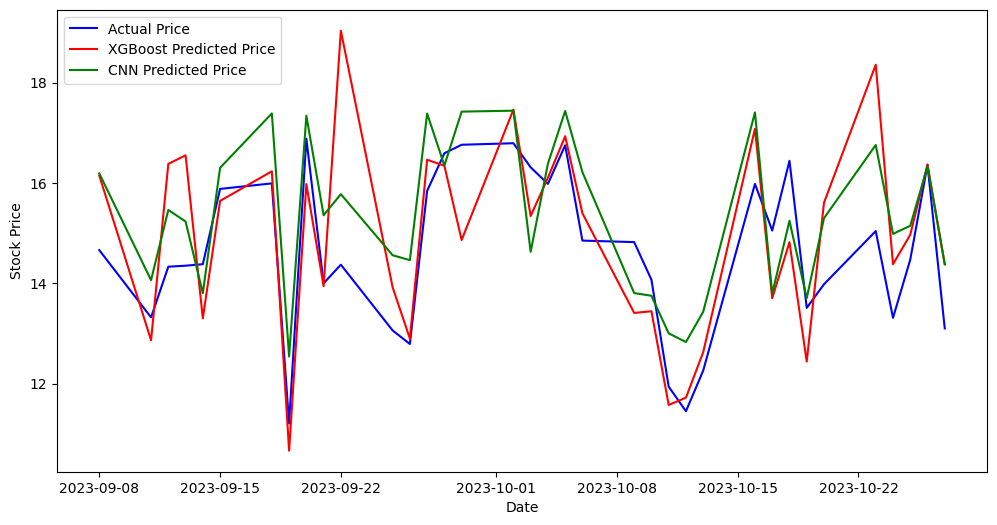

In [5]:
stockFit("AAL")

In [6]:
def stockForecast(stock_symbol:str):
    # Define the stock symbol and fetch real-time data
    stock_symbol = stock_symbol
    stock_data = yf.download(stock_symbol, start="2020-01-01", end="2023-12-31")

    # Select the 'Date' and 'Close' columns
    data = stock_data[['Close']]

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Feature engineering (e.g., using rolling mean as a feature)
    window_size = 30
    data['RollingMean'] = data['Close'].rolling(window=window_size).mean()

    # Drop missing values after feature engineering
    data.dropna(inplace=True)

    # Define the features and target variable
    X = data[['RollingMean', 'Return']].values
    y = data['Close'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train an XGBoost model
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)

    # Create a CNN model for stock price prediction
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input shape depends on your features
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the CNN model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Generate future predictions using XGBoost and CNN models
    n_future_periods = 30

    cnn_future_predictions = []

    for _ in range(n_future_periods):
        cnn_pred = model.predict(X_test[-1].reshape(1, -1))
        cnn_future_predictions.append(cnn_pred[0, 0])
        X_test[-1] = np.roll(X_test[-1], shift=-1)
        X_test[-1, -1] = cnn_pred[0, 0]

    # Visualize the results, including future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
    plt.plot(data.index[-len(y_test):], xgb_model.predict(X_test), label='XGBoost Predicted Price', color='red')
    plt.plot(data.index[-len(y_test):], model.predict(X_test), label='CNN Predicted Price', color='green')

    # Extend the date index for future predictions
    future_date_index = pd.date_range(start=data.index[-len(y_test)], periods=len(y_test) + n_future_periods, closed='right')

    # Plot XGBoost future predictions
    plt.plot(future_date_index[-n_future_periods:], cnn_future_predictions, linestyle='--', color='orange', label='CNN Future Predictions')

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10


/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3632904384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close'].pct_change()
/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3632904384.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RollingMean'] = data['Close'].rolling(window=window_size).mean()
/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3632904384.py:17: SettingWithCopyWarning: 
A value is trying to be set on 

24/24 [==============================] - 0s 632us/step - loss: 3974.8765
Epoch 2/10
24/24 [==============================] - 0s 667us/step - loss: 2192.4773
Epoch 3/10
24/24 [==============================] - 0s 562us/step - loss: 1020.7987
Epoch 4/10
24/24 [==============================] - 0s 536us/step - loss: 386.9647
Epoch 5/10
24/24 [==============================] - 0s 513us/step - loss: 117.9114
Epoch 6/10
24/24 [==============================] - 0s 517us/step - loss: 43.1250
Epoch 7/10
24/24 [==============================] - 0s 513us/step - loss: 30.6640
Epoch 8/10
24/24 [==============================] - 0s 511us/step - loss: 29.7857
Epoch 9/10
24/24 [==============================] - 0s 508us/step - loss: 29.7462
Epoch 10/10
6/6 [==============================] - 0s 706us/step


/var/folders/1r/p8j6nsfj4t3fvrfhnjkqrlrc0000gn/T/ipykernel_97660/3632904384.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_date_index = pd.date_range(start=data.index[-len(y_test)], periods=len(y_test) + n_future_periods, closed='right')


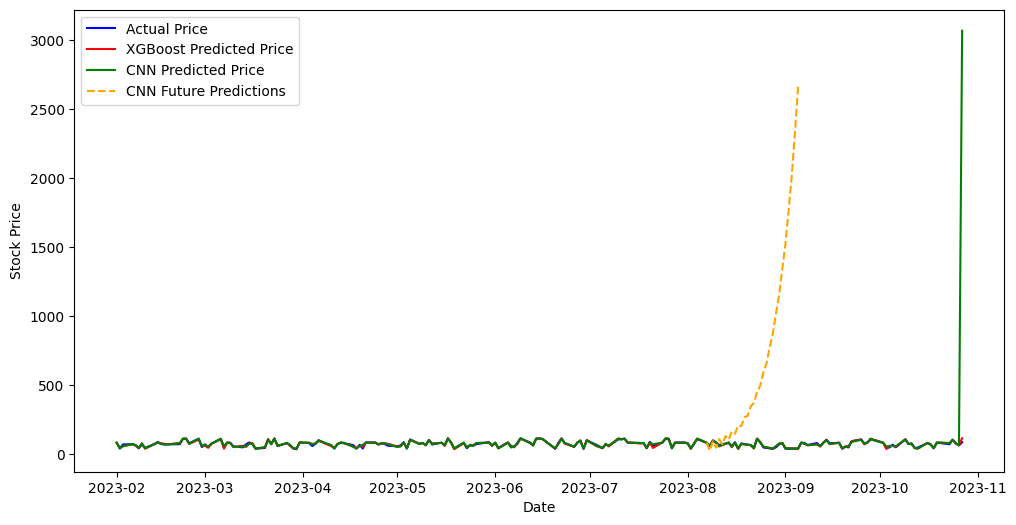

In [7]:
stockForecast("GE")